In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plb 
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
rentals = pd.read_csv('NEWFINALTODAYformated_OutlierFixed.csv')

In [3]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1690 non-null   int64  
 1   BedRooms       1690 non-null   float64
 2   SQFT           1690 non-null   float64
 3   Location       1690 non-null   object 
 4   BathRooms      1690 non-null   float64
 5   No_Smoke       1690 non-null   float64
 6   No_Park        1690 non-null   float64
 7   W_D_Lndry      1690 non-null   float64
 8   Pets           1690 non-null   float64
 9   Property_Type  1690 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 132.2+ KB


In [4]:
rentals = pd.get_dummies(rentals, drop_first=True)
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       1690 non-null   int64  
 1   BedRooms                    1690 non-null   float64
 2   SQFT                        1690 non-null   float64
 3   BathRooms                   1690 non-null   float64
 4   No_Smoke                    1690 non-null   float64
 5   No_Park                     1690 non-null   float64
 6   W_D_Lndry                   1690 non-null   float64
 7   Pets                        1690 non-null   float64
 8   Property_Type               1690 non-null   float64
 9   Location_Davis              1690 non-null   uint8  
 10  Location_El Dorado Hills    1690 non-null   uint8  
 11  Location_Elk Grove          1690 non-null   uint8  
 12  Location_Fair Oaks          1690 non-null   uint8  
 13  Location_Folsom             1690 

In [12]:
len(rentals[rentals['Price'] < 1300])

53

In [10]:
rentals.Price.describe()

count    2448.000000
mean     2102.054739
std       503.925573
min       700.000000
25%      1785.000000
50%      2055.000000
75%      2354.250000
max      4026.000000
Name: Price, dtype: float64

In [14]:
len(rentals[rentals['Price'] > 3000])

108

In [3]:
rentals = rentals[rentals['Price'] < 3500]

In [4]:
rentals = rentals[rentals['Price'] > 900]

In [3]:
rentals = pd.get_dummies(rentals)

In [4]:
rentals.head()

,Price,BedRooms,SQFT,BathRooms,No_Smoke,No_Park,W_D_Lndry,Pets,Property_Type,Log_Price
0,1625,1.0,592.0,1.0,0.0,0.0,0.0,1.0,1.0,7.393263
1,1655,1.0,605.0,1.0,0.0,0.0,1.0,1.0,1.0,7.411556
2,1750,3.0,1850.0,2.0,1.0,0.0,1.0,1.0,2.0,7.467371
3,2225,2.0,874.0,1.0,1.0,0.0,1.0,1.0,1.0,7.707512
4,1300,1.0,575.0,1.0,1.0,0.0,0.0,0.0,1.0,7.170120


In [5]:
# slice data into features and target
X_orgi = rentals.drop(columns = ['Price'])
X_org = sm.add_constant(X_orgi)

y_org = rentals.loc[:, 'Price']

# fit model with target as housing price index 
log_model = sm.OLS(y_org, X_org, data=rentals) 

# fit our model 
results = log_model.fit()
results.summary()

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     133.7
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          2.00e-307
Time:                        13:49:44   Log-Likelihood:                -12264.
No. Observations:                1690   AIC:                         2.457e+04
Df Residuals:                    1671   BIC:                         2.467e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        562.4849     58.435      9.626      0.000     447.872     677.098
BedRooms                     -17.8973     19.148     -0.935      0.350     -55.453      19.659
SQFT                           1.0407      0.038     27.359      0.000       0.966       1.115
BathRooms                     34.6100     24.557      1.409      0.159     -13.556      82.776
No_Smoke                     -31.0517     18.291     -1.698      0.090     -66.928       4.825
No_Park                     -318.3135    155.287     -2.050      0.041    -622.890     -13.737
W_D_Lndry                    323.5799     23.673     13.669      0.000     277.147     370.012
Pets                         189.7710     24.589      7.718      0.000     141.543     237.999
Property_Type                -42.3689     28.084     -1.509      0.132     -97.452      12.715
Location_Davis                45.3372     65.035      0.697      0.486     -82.221     172.895
Location_El Dorado Hills     186.9081     69.445      2.691      0.007      50.700     323.116
Location_Elk Grove           165.6079     59.005      2.807      0.005      49.876     281.339
Location_Fair Oaks           224.4615     57.427      3.909      0.000     111.825     337.098
Location_Folsom              109.4895     52.092      2.102      0.036       7.317     211.662
Location_Natomas             180.1041     54.553      3.301      0.001      73.105     287.103
Location_Rancho Cordova       -5.4981     54.825     -0.100      0.920    -113.031     102.035
Location_Rocklin             135.3103     50.811      2.663      0.008      35.651     234.970
Location_Roseville           304.7454     49.295      6.182      0.000     208.060     401.431
Location_Sacramento          267.4853     42.108      6.352      0.000     184.896     350.075
==============================================================================
Omnibus:                      203.307   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1971.792
Skew:                          -0.082   Prob(JB):                         0.00
Kurtosis:                       8.289   Cond. No.                     1.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Train / Test Split

In [6]:
X, y = rentals.drop(['Price', 'No_Park', 'No_Smoke', 'Pets'],axis=1), rentals['Price']


X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=9)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=9)

## Polynomial 2nd Degree

In [7]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
    
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.transform(X_val)
X_poly_test = poly.transform(X_test)

## Standard Scaller

In [8]:
scaler = StandardScaler(with_mean=False)

X_scale_train = scaler.fit_transform(X_poly_train)
X_scale_val = scaler.transform(X_poly_val)
X_scale_test = scaler.transform(X_poly_test)

# Regularization

## Lasso

In [9]:
alphavec = 10**np.linspace(-2,1,10000)

lasso_model = LassoCV(alphas=alphavec, cv=3).fit(X_scale_train, y_train)

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22186.69039902091, tolerance: 19920.101906518725
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23654.136619344354, tolerance: 19920.101906518725
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24482.988545797765, tolerance: 19920.101906518725
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay

In [10]:
las_alpha = lasso_model.alpha_
las_alpha

1.5115340740583927

In [11]:
las = Lasso(alpha=las_alpha)

las.fit(X_scale_train, y_train)
print(f'Lasso Regression train R^2: {las.score(X_scale_train, y_train):.5f}')
print(f'Lasso Regression val R^2: {las.score(X_scale_val, y_val):.5f}')
print("")
print(f'Lasso Regression RMSE (train): {mean_squared_error(y_train, las.predict(X_scale_train), squared=False):.5f}')
print(f'Lasso Regression RMSE (val): {mean_squared_error(y_val, las.predict(X_scale_val), squared=False):.5f}')

Lasso Regression train R^2: 0.73063
Lasso Regression val R^2: 0.54180

Lasso Regression RMSE (train): 280.11589
Lasso Regression RMSE (val): 355.80812


## Ridge

In [ ]:
alphavec = 10**np.linspace(-2,2,500)

ridge_model = RidgeCV(alphas=alphavec, cv=3)
ridge_model.fit(X_scale_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.01862899e-02, 1.03760502e-02, 1.05693455e-02,
       1.07662418e-02, 1.09668060e-02, 1.11711065e-02, 1.13792129e-02,
       1.15911962e-02, 1.18071285e-02, 1.20270833e-02, 1.22511358e-02,
       1.24793621e-02, 1.27118400e-02, 1.29486487e-02, 1.31898690e-02,
       1.34355829e-02, 1.36858742e-02, 1.39408283e-02, 1.42005318e-02,
       1.44650734e-02, 1.47345431e-0...
       6.54080591e+01, 6.66265452e+01, 6.78677305e+01, 6.91320378e+01,
       7.04198979e+01, 7.17317494e+01, 7.30680395e+01, 7.44292233e+01,
       7.58157646e+01, 7.72281357e+01, 7.86668179e+01, 8.01323013e+01,
       8.16250851e+01, 8.31456781e+01, 8.46945981e+01, 8.62723729e+01,
       8.78795401e+01, 8.95166472e+01, 9.11842520e+01, 9.28829225e+01,
       9.46132376e+01, 9.63757866e+01, 9.81711702e+01, 1.00000000e+02]),
        cv=3)

In [ ]:
rid_alpha = ridge_model.alpha_
rid_alpha

In [14]:
rid = Ridge(alpha=rid_alpha)

rid.fit(X_scale_train, y_train)
print(f'Ridge Regression train R^2: {rid.score(X_scale_train, y_train):.5f}')
print(f'Ridge Regression val R^2: {rid.score(X_scale_val, y_val):.5f}')
print("")
print(f'Ridge Regression RMSE (train): {mean_squared_error(y_train, rid.predict(X_scale_train), squared=False):.5f}')
print(f'Ridge Regression RMSE (val): {mean_squared_error(y_val, rid.predict(X_scale_val), squared=False):.5f}')

Ridge Regression train R^2: 0.66701
Ridge Regression val R^2: 0.69254

Ridge Regression RMSE (train): 253.13089
Ridge Regression RMSE (val): 245.38171


## Ridge versus Lasso Evaluation

### Using KFolds for Cross Validation

In [29]:
kf = KFold(n_splits=3, shuffle=True, random_state = 12)

cv_rid_train_r2s, cv_las_train_r2s = [], []
cv_rid_val_r2s, cv_las_val_r2s = [], []

rid_rmses_train, las_rmses_train = [], []
rid_rmses_val, las_rmses_val = [], []

X_kf, y_kf = np.array(X), np.array(y)

for train_ind, val_ind in kf.split(X, y):
    
    X_train, y_train = X_kf[train_ind], y_kf[train_ind]
    X_val, y_val = X_kf[val_ind], y_kf[val_ind]
    
    # Set up poly features
    poly = PolynomialFeatures(degree=2, interaction_only=False)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.transform(X_val)
    
    # Scaling for Ridge & Lasso 
    scaler = StandardScaler(with_mean=False)
    X_scale_train = scaler.fit_transform(X_poly_train)
    X_scale_val = scaler.transform(X_poly_val)
    
    # Lasso
    las = Lasso(alpha=las_alpha)
    las.fit(X_scale_train, y_train)
    
    cv_las_train_r2s.append(las.score(X_scale_train, y_train))
    cv_las_val_r2s.append(las.score(X_scale_val, y_val))
    las_rmses_train.append(mean_squared_error(y_train, las.predict(X_scale_train), squared=False))
    las_rmses_val.append(mean_squared_error(y_val, las.predict(X_scale_val), squared=False))
    
    
    # Ridge
    rid = Ridge(alpha=rid_alpha)
    rid.fit(X_scale_train, y_train)
    
    cv_rid_train_r2s.append(rid.score(X_scale_train, y_train))
    cv_rid_val_r2s.append(rid.score(X_scale_val, y_val))
    rid_rmses_train.append(mean_squared_error(y_train, rid.predict(X_scale_train), squared=False))
    rid_rmses_val.append(mean_squared_error(y_val, rid.predict(X_scale_val), squared=False))

# Summary output

print("Ridge")
print(f'Ridge mean cv r^2 (TRAIN): {np.mean(cv_rid_train_r2s):.5f} +- {np.std(cv_rid_train_r2s):.5f}')
print(f'Ridge mean cv r^2 (VAL): {np.mean(cv_rid_val_r2s):.5f} +- {np.std(cv_rid_val_r2s):.5f}')
print(f'Ridge mean RMSE (TRAIN): {np.mean(rid_rmses_train):.5f} +- {np.std(rid_rmses_train):.3f}')
print(f'Ridge mean RMSE (VAL): {np.mean(rid_rmses_train):.5f} +- {np.std(rid_rmses_train):.3f}')
print('')
print("Lasso")
print(f'Lasso mean cv r^2 (TRAIN): {np.mean(cv_las_train_r2s):.5f} +- {np.std(cv_las_train_r2s):.5f}')
print(f'Lasso mean cv r^2 (VAL): {np.mean(cv_las_val_r2s):.5f} +- {np.std(cv_las_val_r2s):.5f}')
print(f'Lasso mean RMSE (VAL): {np.mean(las_rmses_train):.5f} +- {np.std(las_rmses_train):.5f}')
print(f'Lasso mean RMSE (VAL): {np.mean(las_rmses_val):.5f} +- {np.std(las_rmses_val):.5f}')    

Ridge
Ridge mean cv r^2 (TRAIN): 0.66883 +- 0.00198
Ridge mean cv r^2 (VAL): 0.65539 +- 0.00383
Ridge mean RMSE (TRAIN): 223.02803 +- 2.142
Ridge mean RMSE (VAL): 223.02803 +- 2.142

Lasso
Lasso mean cv r^2 (TRAIN): 0.66431 +- 0.00161
Lasso mean cv r^2 (VAL): 0.65363 +- 0.00602
Lasso mean RMSE (VAL): 224.54569 +- 2.15681
Lasso mean RMSE (VAL): 228.04391 +- 5.65100


###  Models Coefficients

In [15]:
rid_coefs = rid.coef_
las_coefs = las.coef_
features = rentals.columns[1:]

coef_data = {'Features': poly.get_feature_names(X.columns),
             'Ridge': rid_coefs,
             'Lasso': las_coefs}

coef_df = pd.DataFrame(coef_data)

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
coef_df.head(10)

,Features,Ridge,Lasso
0,1,0.000000,0.000000
1,BedRooms,-111.402819,-144.265680
2,SQFT,447.934450,533.458259
3,BathRooms,64.409695,0.000000
4,W_D_Lndry,43.374579,74.390274
5,Property_Type,27.810484,20.574543
6,BedRooms^2,158.454403,281.633891
7,BedRooms SQFT,209.484020,221.844006
8,BedRooms BathRooms,-202.280459,-368.031394
9,BedRooms W_D_Lndry,-41.067899,-8.118140


## Full train and test

In [16]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
    
X_poly_train = poly.fit_transform(X)
X_poly_test = poly.transform(X_test)

# Scaling for Ridge & Lasso 
scaler = StandardScaler(with_mean=False)

X_scale_train = scaler.fit_transform(X_poly_train)
X_scale_test = scaler.transform(X_poly_test)

In [17]:
rid = Ridge(alpha=rid_alpha)
rid.fit(X_scale_train, y)

Ridge(alpha=6.75552831533164)

## Results

In [18]:
print("Ridge - training score: ", rid.score(X_scale_train, y))
print("Rige - test score: ", rid.score(X_scale_test, y_test))
print("")
print("RMSE - training: ", mean_squared_error(y, rid.predict(X_scale_train), squared=False))
print("RMSE - test: ", mean_squared_error(y_test, rid.predict(X_scale_test), squared=False))
print("")
print("MAE - training: ", np.mean(np.abs(rid.predict(X_scale_train) - y)))
print("MAE - test: ", np.mean(np.abs(rid.predict(X_scale_test) - y_test)))

Ridge - training score:  0.6746031094742542
Rige - test score:  0.6898606383099264

RMSE - training:  250.68140099376248
RMSE - test:  256.0903058470375

MAE - training:  180.91952088286098
MAE - test:  181.50082233865282


In [19]:
### Actual vs Predicted
residuals = rid.predict(X_scale_test)

/var/folders/71/xlbnyb5s341dqzxgjd0pzzqw0000gn/T/ipykernel_4543/4290510875.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plb.plot(residuals, p(residuals), 'm-', color='red')


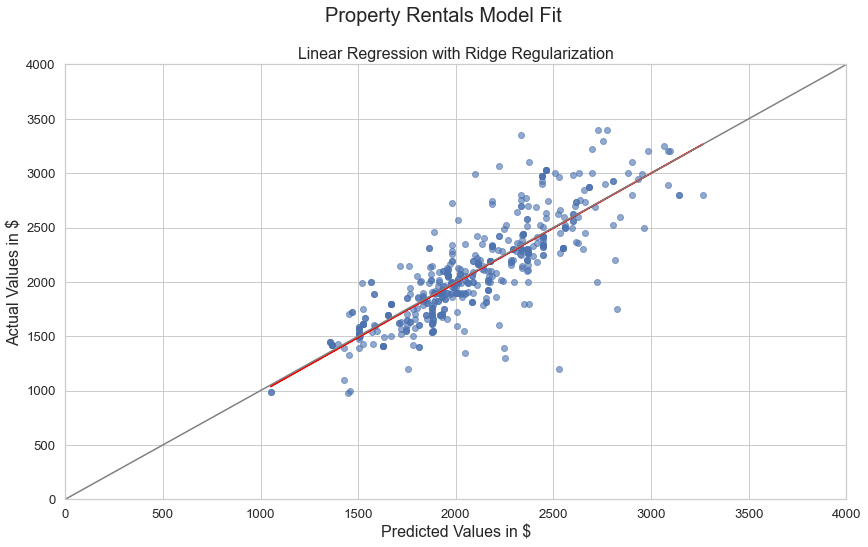

In [20]:
plt.figure(figsize=(14, 8))
plt.scatter(residuals, y_test, alpha=.6) 

z = np.polyfit(residuals, y_test, 1)
p = np.poly1d(z)
plb.plot(residuals, p(residuals), 'm-', color='red')
plt.plot(np.linspace(0,4000,1000), np.linspace(0,4000,1000), color='grey')

plt.xlim(0, 4000)
plt.ylim(0, 4000)

plt.suptitle('Property Rentals Model Fit', fontsize=20, fontname='Arial')
plt.title('Linear Regression with Ridge Regularization', fontsize=16, fontname='Arial')
plt.xlabel('Predicted Values in $', fontsize=16, fontname='Arial')
plt.ylabel('Actual Values in $', fontsize=16, fontname='Arial');

#plt.savefig('Line_Fit.png')

In [21]:
### Residuals Plot
residual2 = (y_test - residuals)

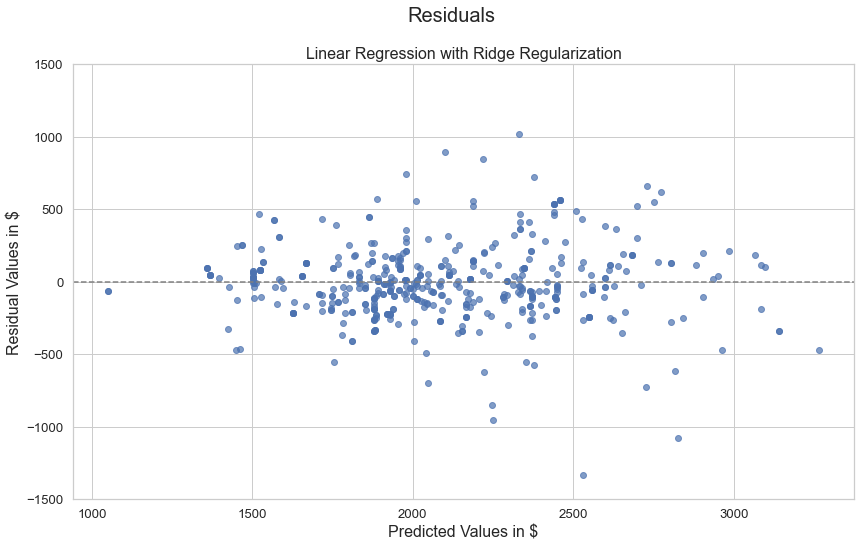

In [22]:
plt.figure(figsize=(14, 8))
plt.scatter(residuals, residual2, alpha=.7)   

plt.axhline(0, linestyle='--', color='grey')
plt.suptitle('Residuals', fontsize=20, fontname='Arial')
plt.title('Linear Regression with Ridge Regularization', fontsize=16, fontname='Arial')
plt.ylim(-1500, 1500)
plt.xlabel('Predicted Values in $', fontsize=16, fontname='Arial')
plt.ylabel('Residual Values in $', fontsize=16, fontname='Arial');

#plt.savefig('Residuals_Ridge.png')

# Appendix

## Distribution of Rental Prices in Sample

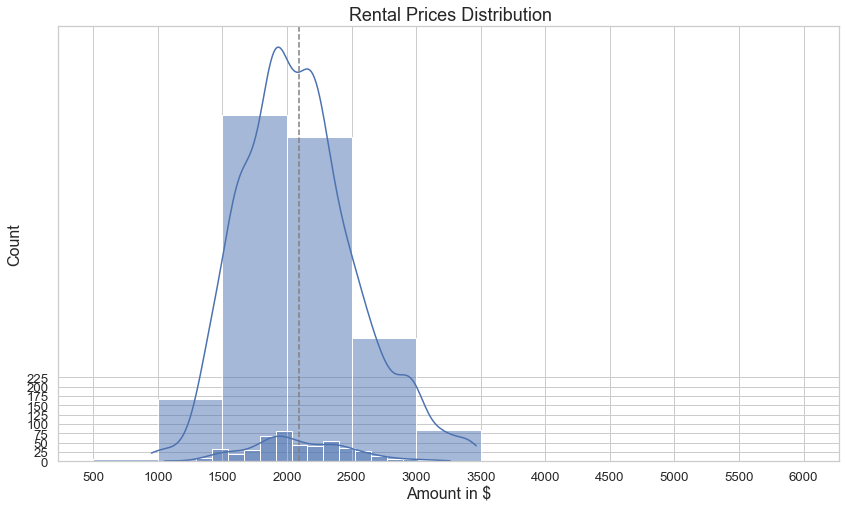

In [23]:
plt.figure(figsize=(14, 8))
ax_actual = sns.histplot(rentals.Price, kde=True, bins=(list(range(500, 6001, 500))))
plt.axvline(rentals.Price.mean(), linestyle='--', color='grey')

ax_predict = sns.histplot(residuals, kde=True)

ax_actual.set_title(' Rental Prices Distribution', fontname='Arial', fontsize=18)
ax_actual.set_xlabel('Amount in $', fontname='Arial', fontsize=16)
ax_actual.set_ylabel('Count', fontname='Arial', fontsize=16)
ax_actual.set_yticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225])
ax_actual.set_xticks(list(range(500, 6001, 500)))
ax_actual.set_xticklabels(list(range(500, 6001, 500)));

#plt.savefig('Rental_Price_Distribution.png');